# stage3-1の続き
`leopard/__init__.py`の中身を`is_simple_core = False`に設定してください

## ステップ30〜32
省略

## ステップ33 ニュートン法を使った最適化（自動計算）

### 33.1　2階微分を求める
$y=x^4-2x^2$について実装する。

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from leopard import Variable

In [2]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

In [3]:
x = Variable(np.array(2.0))

y = f(x)
y.backward(create_graph=True)
print(x.grad)

gx = x.grad
gx.backward()
print(x.grad)

variable(24.0)
variable(68.0)


$f(x)=x^4-2x^2$において、$f'(x)=4x^3-4x$より$f'(2)=24$となる。<br>
また、$f''(x)=12x^2-4$より$f''(2)=44$となり、上記の結果は誤り。<br>
原因は、1階微分の24に2階微分の44が<strong>加算</strong>されているためである。

In [4]:
x = Variable(np.array(2.0))

y = f(x)
y.backward(create_graph=True)
print(x.grad)

gx = x.grad
x.cleargrad() # grad clear
gx.backward()
print(x.grad)

variable(24.0)
variable(44.0)


### 33.2 ニュートン法による最適化
以下の式で表されるニュートン法の最適化を実装してみる。
$$x \leftarrow x - \frac{f'(x)}{f''(x)} $$

In [5]:
x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)

    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad

    x.data -= gx.data / gx2.data

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


## ステップ34　sin関数の高階微分
### 34.1-34.2
省略
### 34.3 sin関数の高階微分

In [6]:
import leopard.functions as F

In [8]:
x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True)

for i in range(3):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(x.grad) # n階微分

variable(-0.8414709848078965)
variable(-0.5403023058681398)
variable(0.8414709848078965)


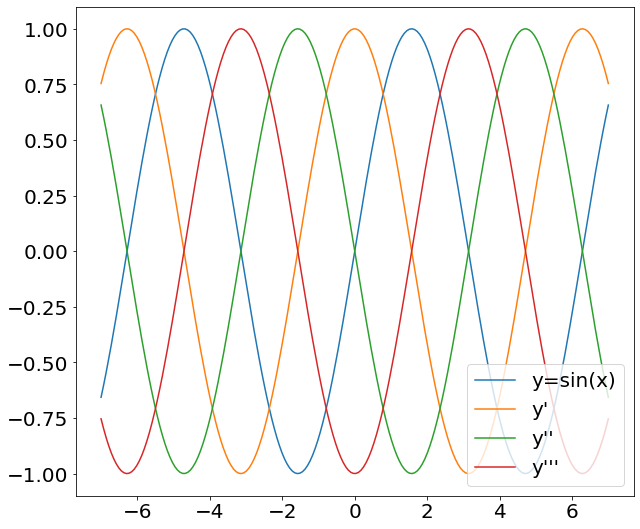

In [14]:
x = Variable(np.linspace(-7, 7, 200))
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data]

for i in range(3):
    logs.append(x.grad.data)
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

labels = ["y=sin(x)", "y'", "y''", "y'''"]

fig, ax = plt.subplots(1, 1, figsize=(10,9))
for i, v in enumerate(logs):
    ax.plot(x.data, logs[i], label=labels[i])
ax.legend(loc='lower right', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

## ステップ35　高階微分の計算グラフ
tanh関数は以下のように表される。
$$y=tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

### 35.1　tanh関数の微分
$$
\begin{aligned}
\frac{\partial tanh(x)}{\partial x} &= \frac{(e^x+e^{-x})(e^x+e^{-x})-(e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2} \\
&= 1 - \frac{(e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2} \\
&= 1 - \biggl\{ \frac{(e^x-e^{-x})^2}{(e^x+e^{-x})^2} \biggr\}^{2} \\
&= 1 - tanh(x)^2 \\
&= 1 - y^2

\end{aligned}
$$

### 35.2-35.3
省略

## ステップ36　高階微分以外の用途
### 36.1　double backpropの用途
次の問題を考えてみる。

----
問：次の２つの式において、$x=2.0$における$\frac{\partial z}{\partial x}$を求めよ。<br>

$$
\begin{aligned}
y &= x^2 \\
z &= \Bigl( \frac{\partial y}{\partial x} \Bigr)^3 + y
\end{aligned}
$$

----

<br>

手計算で$\frac{\partial z}{\partial x}$を求めてみると以下のようになる。

$$
\begin{aligned}
\frac{\partial y}{\partial x} &= 2x \\
z &= \Bigl( \frac{\partial y}{\partial x} \Bigr)^3 + y = 8x^3 + x^2 \\
\frac{\partial z}{\partial x} &= 24x^2 + 2x
\end{aligned}
$$

$x=2.0$を代入すれば、100を得る。これを踏まえて実装してみる。

In [16]:
x = Variable(np.array(2.0))
y = x ** 2
y.backward(create_graph=True)
gx = x.grad # x.gradは変数ではなく、計算グラフ
x.cleargrad()

z = gx ** 3 + y
z.backward()
print(x.grad)

variable(100.0)


- memo<br>
上記のコードの4行目にある`gx = x.grad`は、単なる変数ではなく、計算グラフ（式）である。<br>
そのため、`x.grad`の計算グラフに対して、さらに逆伝播を行うことができる。

### 36.2 ディープラーニングの研究での使用例
省略

# 第３ステージ終了